# TP 6 : Dessin de fractales (avec récursivité)

## `matplotlib`

`matplotlib` est un module Python permettant de faire des dessins, que vous avez déjà vu en cours de Physique et qu'on rappelle ici.  
Il faut commencer par importer `matplotlib` :

In [1]:
import matplotlib.pyplot as plt

Si la ligne précédente n'a pas fonctionné, vous avez peut-être besoin d'installer `matplotlib` avec `pip install matplotlib` (si `pip` est installé sur votre ordinateur).  
Il faudra ensuite préfixer toutes les fonctions de `matplotlib` par `plt.`.  
La fonction la plus importante est `plt.plot`, qui sert à relier des points par des segments de droite. Si `X` est une liste d'abscisses et `Y` une liste d'ordonnées, `plt.plot(X, Y)` relie les points d'abscisses `X` et d'ordonnées `Y`.  
Par exemple, pour relier le point $(3, 7)$ au point $(4, 5)$, on va écrire :

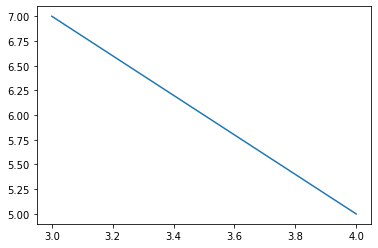

In [2]:
plt.plot([3, 4], [7, 5]);

**Remarque** : le `;` à la fin de `plot` sert à éviter d'afficher la valeur de retour de `plt.plot`.  
**ATTENTION** : Pour relier un point `p = (x1, y1)` à un point `q = (x2, y2)`, on écrit donc `plt.plot([x1, x2], [y1, y2])` et non pas `plt.plot(p, q)`.

**Exercice** : Écrire une fonction `segment` telle que, si `p` et `q` sont des couples (des points), `segment(p, q)` dessine le segment d'extrémités `p` et `q`. Par exemple, `segment((3, 7), (4, 5))` doit dessiner le segment sur le dessin ci-dessus.

Quand on dessine une fonction avec `matplotlib`, on en dessine en fait une approximation : la courbe représentative d'une fonction contenant une infinité de points, il n'est pas possible de la représenter sur un nombre fini de pixels.  
On choisit en général de relier des points régulièrement espacés de $h$ sur la courbe qu'on veut représenter. Plus $h$ est petit, plus l'approximation sera bonne mais plus cela va prendre de temps à afficher. Par exemple, voici la courbe de `sin` avec $h = 2$ (à gauche) et $h = 0.01$ (à droite) :

Text(0.5, 1.0, 'h = 0.01')

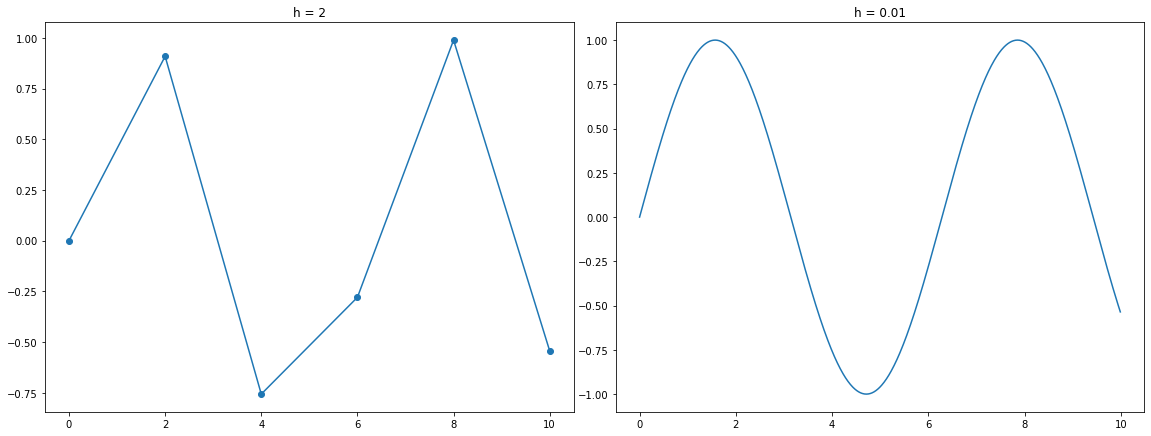

In [3]:
import numpy as np
t = list(range(0, 11, 2))
x = [0.01*i for i in range(1000)]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
plt.tight_layout()
ax1.plot(t, np.sin(t))
ax1.set_title("h = 2")
ax1.scatter(t, np.sin(t))
ax2.plot(x, np.sin(x))
ax2.set_title("h = 0.01")

Pour afficher la courbe d'une fonction `f`, on écrit `plt.plot(x, y)` où `x` est une liste d'abscisses et `y` la liste des images correspondantes. Par exemple, pour la fonction racine carrée :

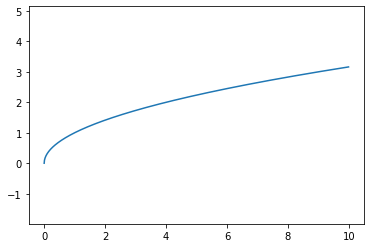

In [4]:
X, Y = [], []
for i in range(1000): # on dessine notre courbe en utilisant 1000 points espacés de 0.01
    X.append(i*0.01)
    Y.append(X[i]**0.5) # racine carré des abscisses
plt.axis("equal")
plt.plot(X, Y);

**Exercice** : Afficher la courbe de $f : x \longmapsto x + \cos(x)$ sur l'intervalle $[0, 10]$.

## Rotation
<center><img src=https://github.com/fortierq/tikz/blob/master/geometry/basis/change_basis.png?raw=true width=250></center>

**Exercice** : Écrire une fonction `rotation` telle que `rotation(r, d, a)` renvoie le point `p` situé à distance `d` du point `r` et faisant un angle `a` dans le sens trigonométrique.  
On rappelle que, si `r` a pour coordonnées $(x_1, y_1)$ et `p` a pour coordonnées $(x_2, y_2)$ :
$$\begin{equation}
    \begin{cases}
      x_2 = x_1 + d \cos(a)\\
      y_2 = y_1 + d \sin(a)
    \end{cases}
\end{equation}$$

On pourra utiliser `np.cos` et `np.sin` après avoir importé `numpy` (`import numpy as np`).

**Exercice** : Vérifier votre fonction précédente en utilisant la fonction `segment` écrite en début de TP.

## Fractale

Dans cette partie, on veut représenter l'arbre fractal suivant :

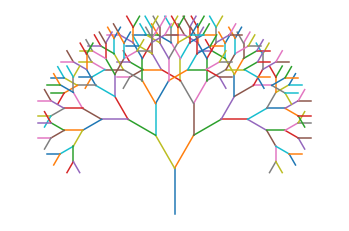

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def segment(p1, p2):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
  
def rotation(c, l, angle):
    return (c[0] + l * np.cos(angle), c[1] + l * np.sin(angle))
    
def arbre(r, l, angle, n):
    if n == 0: # cas de base : on arrête les appels récursifs
        return
    p = rotation(r, l, angle)
    segment(r, p)
    arbre(p, l/1.2, angle - np.pi/6, n-1)
    arbre(p, l/1.2, angle + np.pi/6, n-1)

plt.axis("equal")
plt.axis("off")
arbre((0, 0), 10, np.pi/2, 8)
plt.show()

Pour cela, on va utiliser une fonction récursive en 3 étapes. D'abord, il faut dessiner la base du tronc (remarque : initialement, le tronc est perpendiculaire à l'axe des abscisses mais, dans les appels récursifs, il fera un angle a) :

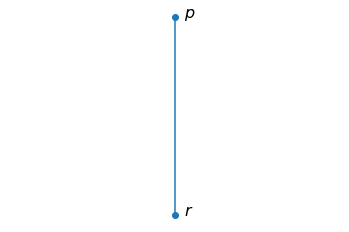

In [6]:
plt.axis("equal")
plt.axis("off")
r = (0, 0)
p = rotation(r, 10, np.pi/2)
segment(r, p)
plt.scatter(*zip(r, p))
plt.text(p[0]+.5, p[1], "$p$", fontsize=16)
plt.text(r[0]+.5, r[1], "$r$", fontsize=16);

Ensuite, on appelle récursivement notre fonction en partant de $p$ pour dessiner le sous-arbre droit :

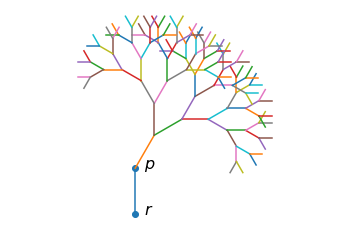

In [7]:
plt.axis("equal")
plt.axis("off")
r = (0, 0)
p = rotation(r, 10, np.pi/2)
segment(r, p)
plt.scatter(*zip(r, p))
plt.text(p[0]+2, p[1], "$p$", fontsize=16)
plt.text(r[0]+2, r[1], "$r$", fontsize=16)
arbre(p, 10/1.2, np.pi/2 - np.pi/6, 7)

Et un deuxième appel récursif pour dessiner le sous-arbre gauche (avec un angle différent) :

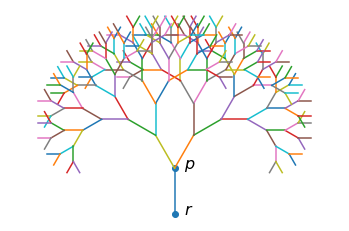

In [8]:
plt.axis("equal")
plt.axis("off")
r = (0, 0)
p = rotation(r, 10, np.pi/2)
segment(r, p)
plt.scatter(*zip(r, p))
plt.text(p[0]+2, p[1], "$p$", fontsize=16)
plt.text(r[0]+2, r[1], "$r$", fontsize=16)
arbre(p, 10/1.2, np.pi/2 - np.pi/6, 7)
arbre(p, 10/1.2, np.pi/2 + np.pi/6, 7)

**Exercice** : Écrire une fonction récursive `arbre` telle que `arbre(r, d, a, n)` dessine un arbre dont le tronc commence au point `r`, est de longueur `d` et avec un angle `a` dans le sens trigonométrique (par rapport à l'axe des abscisses).  
Cette fonction devra donc afficher le tronc puis s'appeller récursivement pour afficher deux sous-arbres plus petits, par exemple dont les longueurs sont divisées par `1.2` et les angles augmentés ou diminués de `np.pi/6`. `n` est le nombre d'appels récursifs : on le diminuera à chaque appel récursif et on s'arrêtera lorsque il vaut 0 (c'est le cas de base).  
On pourra réutiliser `segment`, `rotation` et compléter la fonction suivante :

In [9]:
def arbre(r, l, angle, n):
    if n == 0: # cas de base : on arrête les appels récursifs
        return
    segment(...) # dessiner le tronc
    arbre(...) # dessiner le sous-arbre droit
    arbre(...) # dessiner le sous-arbre gauche